In [19]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import h5py
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

In [20]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [21]:
fnames = [os.path.join('/home/a/Downloads/cats_and_dogs_small/train/cats', fname) for
        fname in os.listdir('/home/a/Downloads/cats_and_dogs_small/train/cats')]

In [22]:
print(fnames[24])

/home/a/Downloads/cats_and_dogs_small/train/cats/cat.600.jpg


(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


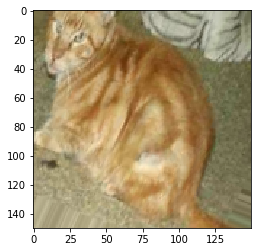

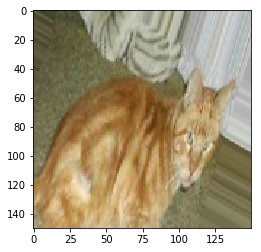

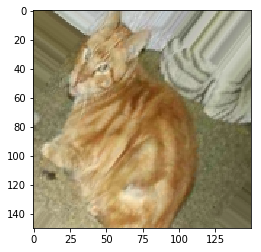

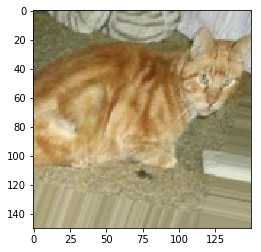

In [23]:
img_path = fnames[24]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i= 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    print(batch.shape)
    i+=1
    if i % 4 == 0:
        break
    
plt.show()

In [24]:
print(x.shape)

(1, 150, 150, 3)


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model. add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [26]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [27]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(
        '/home/a/Downloads/cats_and_dogs_small/train',
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/home/a/Downloads/cats_and_dogs_small/validation',
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
hitory = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs = 100,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/100
50/50 [==============================] - 128s 3s/step - loss: 0.6968 - acc: 0.5181 - val_loss: 0.6878 - val_acc: 0.5830
Epoch 2/100
50/50 [==============================] - 99s 2s/step - loss: 0.6911 - acc: 0.5325 - val_loss: 0.6779 - val_acc: 0.5680
Epoch 3/100
50/50 [==============================] - 99s 2s/step - loss: 0.6832 - acc: 0.5506 - val_loss: 0.6697 - val_acc: 0.5730
Epoch 4/100
50/50 [==============================] - 87s 2s/step - loss: 0.6771 - acc: 0.5787 - val_loss: 0.6903 - val_acc: 0.5120
Epoch 5/100
50/50 [==============================] - 89s 2s/step - loss: 0.6741 - acc: 0.5544 - val_loss: 0.6684 - val_acc: 0.5810
Epoch 6/100
50/50 [==============================] - 82s 2s/step - loss: 0.6732 - acc: 0.5819 - val_loss: 0.6767 - val_acc: 0.5320
Epoch 7/100
50/50 [==============================] - 86s 2s/step - loss: 0.6578 - acc: 0.6050 - val_loss: 0.6378 - val_acc: 0.6430
Epoch 8/100
50/50 [==============================] - 90s 2s/step - loss: 0.6531 - 

50/50 [==============================] - 90s 2s/step - loss: 0.4629 - acc: 0.7788 - val_loss: 0.4461 - val_acc: 0.7920
Epoch 64/100
50/50 [==============================] - 79s 2s/step - loss: 0.4728 - acc: 0.7800 - val_loss: 0.4461 - val_acc: 0.7890
Epoch 65/100
50/50 [==============================] - 79s 2s/step - loss: 0.4510 - acc: 0.7887 - val_loss: 0.4607 - val_acc: 0.7730
Epoch 66/100
50/50 [==============================] - 80s 2s/step - loss: 0.4557 - acc: 0.7950 - val_loss: 0.4476 - val_acc: 0.7950
Epoch 67/100
50/50 [==============================] - 83s 2s/step - loss: 0.4747 - acc: 0.7669 - val_loss: 0.4364 - val_acc: 0.7910
Epoch 68/100
50/50 [==============================] - 78s 2s/step - loss: 0.4376 - acc: 0.8050 - val_loss: 0.4986 - val_acc: 0.7550
Epoch 69/100
50/50 [==============================] - 81s 2s/step - loss: 0.4787 - acc: 0.7756 - val_loss: 0.4437 - val_acc: 0.7830
Epoch 70/100
50/50 [==============================] - 79s 2s/step - loss: 0.4557 - acc: 0

In [36]:
acc = hitory.history['acc']
val_acc = hitory.history['val_acc']
loss = hitory.history['loss']
val_loss = hitory.history['val_loss']

epochs = range(1,len(acc)+1)



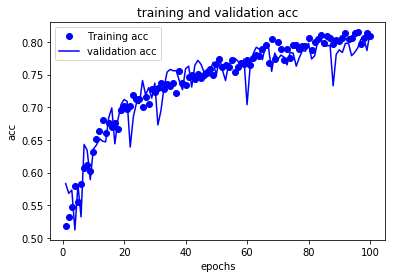

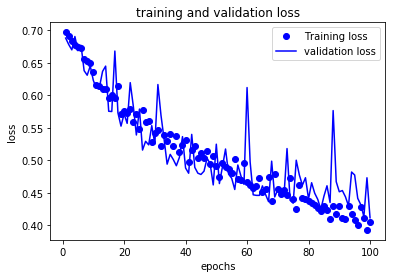

In [37]:
plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc,'b', label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()